# Amazon review text clustering

In [66]:
import pandas
import gzip
import json
import ast

In [67]:
titleStore = []

with gzip.open('meta_Clothing_Shoes_and_Jewelry.json.gz','r') as fin:
    counter = 0
    for line in fin:
        if counter > 3:
            break;
        else:
            counter += 1
        titleStore.append(ast.literal_eval(line.decode('ASCII'))['title'].split())

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


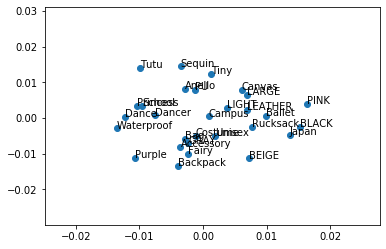

In [68]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

model = Word2Vec(titleStore, min_count=1)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Fashion MNIST

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


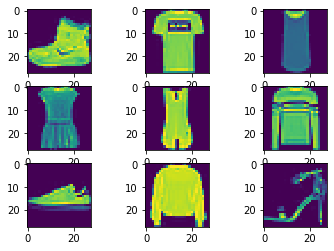

In [72]:
# example of loading the fashion mnist dataset
from keras.datasets import fashion_mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()